In [30]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Import data from train.csv file
dataset = pd.read_csv("train.csv")

In [32]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
# Feature Engineering: 
# Create new features (input variables or new columns using existing columns)
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

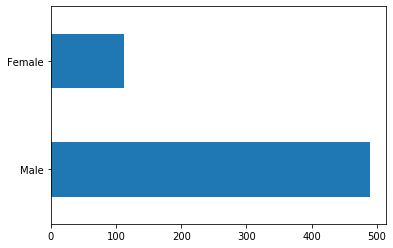

In [34]:
dataset["Gender"].value_counts().plot(kind="barh")

In [35]:
# Fill missing values with mode of Gender column
dataset["Gender"] = dataset["Gender"].fillna(dataset["Gender"].mode().values[0])

In [36]:
dataset["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

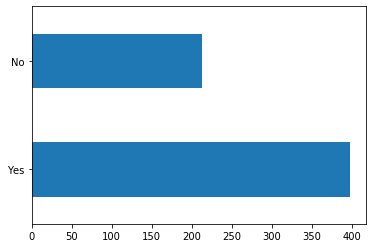

In [37]:
# Fill missing values with mode of Marriage column
dataset["Married"].value_counts().plot(kind="barh")

In [38]:
# Fill missing values with mode of Gender column
dataset["Married"] = dataset["Married"].fillna(dataset["Married"].mode().values[0])
dataset["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

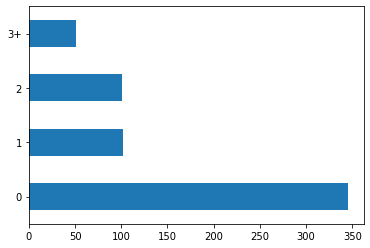

In [39]:
# Fill missing values with mode of Dependents column
dataset["Dependents"].value_counts().plot(kind="barh")

In [40]:
# list1 = []
# for i in range(100):
#     if dataset["Spouse_empl"].loc[i]=="no":
#         x = int(dataset["No of Childern"].loc[i]) + 1
#         list1.append(x)
#     elif dataset["Spouse_empl"].loc[i]=="yes":
#         x = int(dataset["No of Children"].loc[i])
#         list1.append(x)
# dataset["New Dependents"] = list1
dataset["Dependents"] = dataset["Dependents"].fillna(str(0))
dataset["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

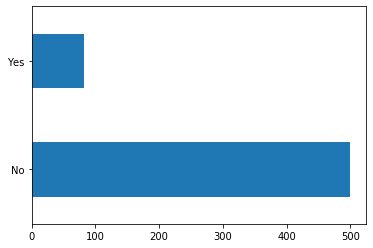

In [41]:
dataset["Self_Employed"].value_counts().plot(kind="barh")

In [42]:
dataset["Self_Employed"] = dataset["Self_Employed"].fillna("No")
dataset["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

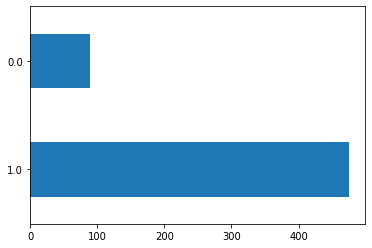

In [43]:
dataset["Credit_History"].value_counts().plot(kind="barh")

In [46]:
dataset["Credit_History"] = dataset["Credit_History"].fillna(dataset["Credit_History"].mode().values[0])

In [47]:
dataset["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

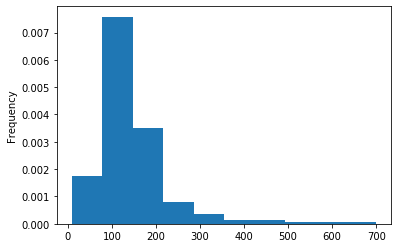

In [53]:
dataset["LoanAmount"].plot(kind="hist", density=True)

In [58]:
# Remove nan value from dataset
dataset.dropna(inplace=True)

In [59]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [60]:
dataset["Total Income"] = dataset["ApplicantIncome"] + dataset["CoapplicantIncome"]
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


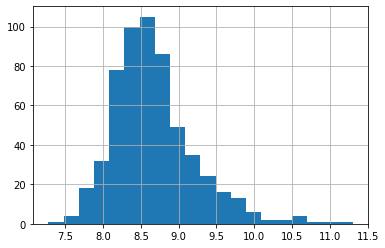

In [62]:
dataset["Total Income Log"] = np.log(dataset["Total Income"])
dataset["Total Income Log"].hist(bins=20)

In [64]:
# Drop Applicant Income and Co application
dataset = dataset.drop(columns=["ApplicantIncome", "CoapplicantIncome"])
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Total Income Log
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0,9.170872


In [69]:
# Re arrange the dataset
list1 = dataset.columns.tolist()
list1 = list1[0:10] + list1[11:] + list1[10:11]
dataset = dataset[list1] # Reassign columns to dataset
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total Income,Total Income Log,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,8.714568,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,8.006368,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,8.505323,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,8.699515,Y
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0,9.170872,Y


In [75]:
dataset = dataset.drop(columns=["Loan_ID"])
y = dataset["Loan_Status"].values
dataset = pd.get_dummies(dataset, drop_first=True)

In [77]:
dataset = dataset.drop(columns=["Loan_Status_Y"])

In [78]:
dataset.head(5)

,LoanAmount,Loan_Amount_Term,Credit_History,Total Income,Total Income Log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,128.0,360.0,1.0,6091.0,8.714568,1,1,1,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,8.006368,1,1,0,0,0,0,1,0,1
3,120.0,360.0,1.0,4941.0,8.505323,1,1,0,0,0,1,0,0,1
4,141.0,360.0,1.0,6000.0,8.699515,1,0,0,0,0,0,0,0,1
5,267.0,360.0,1.0,9613.0,9.170872,1,1,0,1,0,0,1,0,1


In [79]:
X = dataset.iloc[:, :].values

In [83]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
# Create 3 different machine learning models

# Fitting XGBoost to the Training set
# from xgboost import XGBClassifier
# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)

# Fitting Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Fitting Random Forest Tree Classifier
from sklearn.ensemble import RandomForestClassifier
rft_classifier = RandomForestClassifier(n_estimators=300, random_state=0)
rft_classifier.fit(X_train, y_train)

# Fitting knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
# Make prediction using all 3 classifiers
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rft = rft_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

In [89]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rft = confusion_matrix(y_test, y_pred_rft)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [91]:
# Accuracy
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rft = accuracy_score(y_test, y_pred_rft)
acc_knn = accuracy_score(y_test, y_pred_knn)

In [107]:
print("Accuracy of Decision Tree is: {}%".format(acc_dt * 100))

Accuracy of Decision Tree is: 70.6896551724138%


In [108]:
print("Accuracy of Random Forest Tree is: {}%".format(acc_rft * 100))

Accuracy of Random Forest Tree is: 84.48275862068965%


In [109]:
print("Accuracy of Knn Classifier is: {}%".format(acc_knn * 100))

Accuracy of Knn Classifier is: 65.51724137931035%
